<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target,columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [3]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

In [4]:
boston = pd.read_csv('./data/boston_data.csv')

In [5]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

In [7]:
boston.index

RangeIndex(start=0, stop=506, step=1)

In [8]:
boston.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
B             float64
LSTAT         float64
MEDV          float64
dtype: object

In [9]:
boston.shape

(506, 15)

In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
CRIM          506 non-null float64
ZN            506 non-null float64
INDUS         506 non-null float64
CHAS          506 non-null float64
NOX           506 non-null float64
RM            506 non-null float64
AGE           506 non-null float64
DIS           506 non-null float64
RAD           506 non-null float64
TAX           506 non-null float64
PTRATIO       506 non-null float64
B             506 non-null float64
LSTAT         506 non-null float64
MEDV          506 non-null float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [11]:
boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
boston.nunique()

Unnamed: 0    506
CRIM          504
ZN             26
INDUS          76
CHAS            2
NOX            81
RM            446
AGE           356
DIS           412
RAD             9
TAX            66
PTRATIO        46
B             357
LSTAT         455
MEDV          229
dtype: int64

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

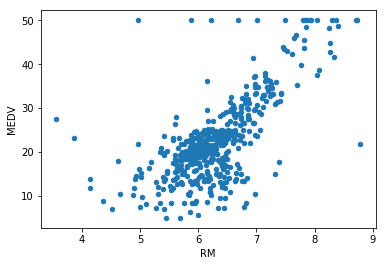

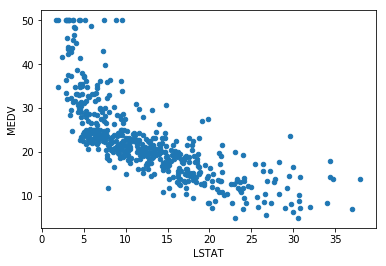

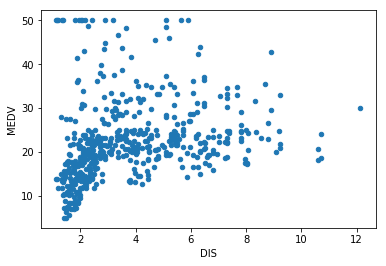

In [13]:
boston.plot(kind='scatter', x='RM', y = 'MEDV' )
boston.plot(kind='scatter', x='LSTAT', y = 'MEDV')
boston.plot(kind='scatter', x='DIS', y = 'MEDV');

There appears to be a potential linear relationship based on the scatterplots for each of the features selected and medium value.  The strongest correlation for MEDV appears to be with room.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [15]:
lr = LinearRegression()

In [16]:
feature_cols = ['RM', 'DIS', 'LSTAT']
X = boston[feature_cols]
y = boston.MEDV

lr.fit(X,y)

print(lr.intercept_)
print(lr.coef_)

2.808292565701233
[ 4.87338565 -0.46128153 -0.72333078]


In [17]:
X_train, X_test, y_train, y_test= train_test_split(X[feature_cols],y,train_size = 0.5, random_state=99)

lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(lr.intercept_)
print(lr.coef_)

6.221244911847562
0.7797957696961255
[ 5.47227476 -0.63452355 -0.85532852]


C:\Users\029165\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


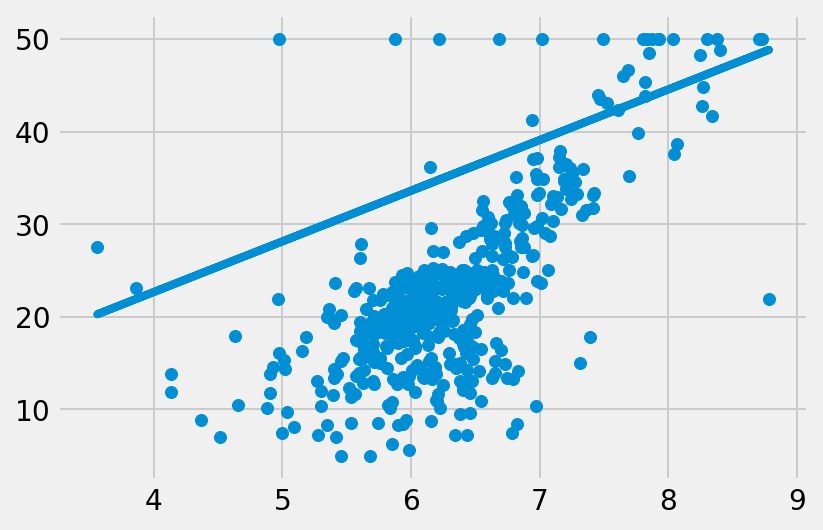

In [18]:
b = lr.intercept_
rmslope = lr.coef_[0]
disslope = lr.coef_[1]
lstatslope = lr.coef_[2]
#plt.plot(x,lr.predict(x), 'yo', x, fit_fn(x), '--k')
plt.plot(X['RM'],X['RM']*rmslope + b )
plt.scatter(X['RM'],y)

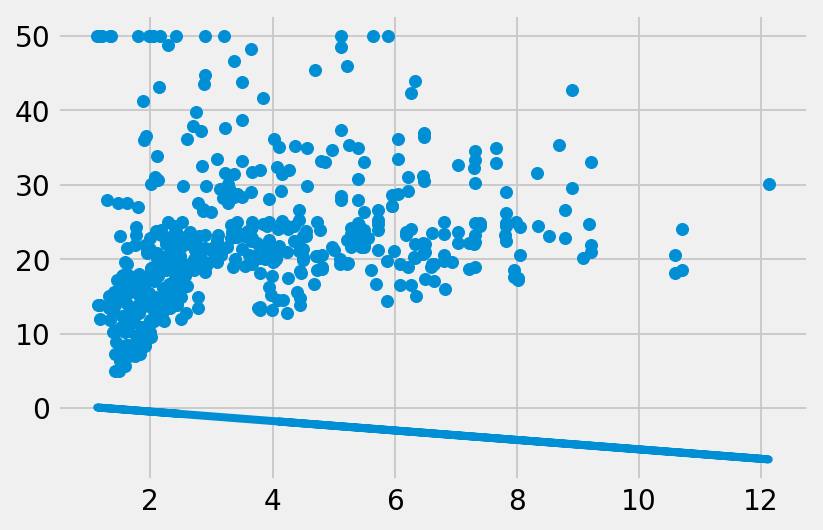

In [19]:
plt.plot(X['DIS'],X['DIS']*disslope + b )
plt.scatter(X['DIS'],y)

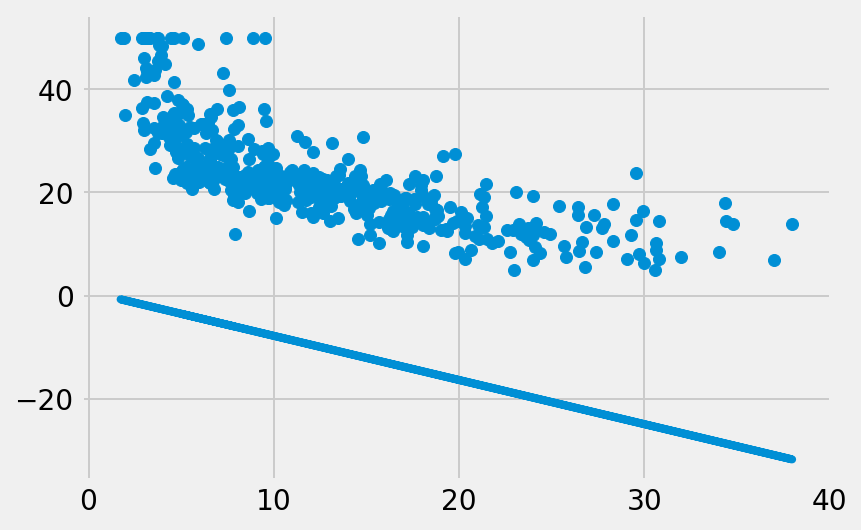

In [20]:
plt.plot(X['LSTAT'],X['LSTAT']*lstatslope + b )
plt.scatter(X['LSTAT'],y)

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X[feature_cols],y,train_size = 0.7, random_state=99)

lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(lr.intercept_)
print(lr.coef_)

6.021623847560224
4.911631111146583
[ 4.75385674 -0.58445946 -0.81792075]


C:\Users\029165\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


C:\Users\029165\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\029165\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


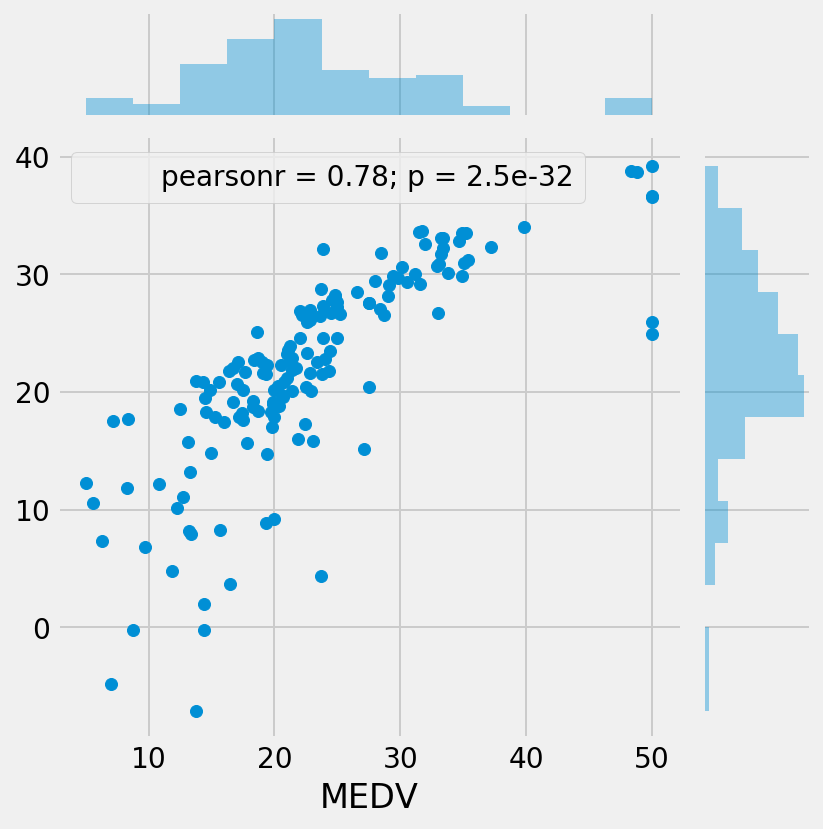

In [22]:
sns.jointplot(y_test, predictions)

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X[feature_cols],y,train_size = 0.9, random_state=99)

lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(lr.intercept_)
print(lr.coef_)

5.135342358536217
2.3096863228975977
[ 5.02450567 -0.5249677  -0.74561788]


C:\Users\029165\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


C:\Users\029165\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\029165\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


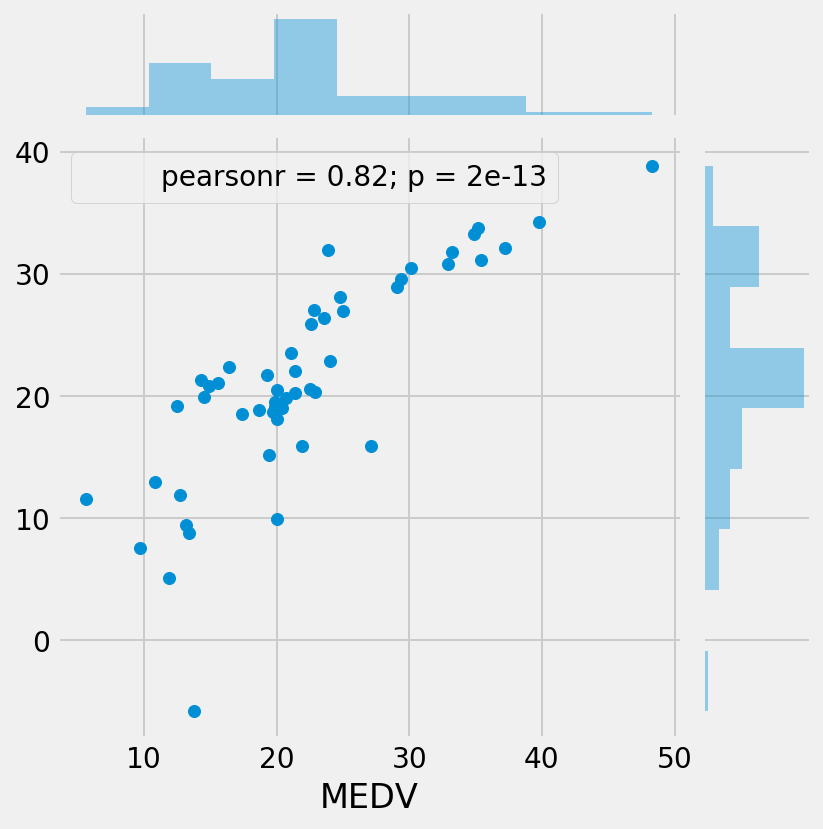

In [24]:
sns.jointplot(y_test, predictions)

Predictions are coming in higher than the actual values, the correlation is .82.  While the model appears to test better with a 90% training set, it is likely that the model is also overfit using a 90/10 training/test split.

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [25]:
from sklearn import model_selection

In [26]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [27]:
mse_values = []
scores = []


print("~~~~ CROSS VALIDATION each fold ~~~~")
for i in range (5,11):
    n=0
    kf = model_selection.KFold(n_splits=i, shuffle=True)
    for train_index, test_index in kf.split(X, y):
        lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])

        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
        scores.append(lr.score(X, y))

        n += 1

        print('Model {}'.format(str(n) + '-' + str(i)))
        print('MSE: {}'.format(mse_values[n-1]))
        print('R2: {}\n'.format(scores[n-1]))


    print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
    print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
    print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1-5
MSE: 29.28411679654794
R2: 0.644514002007208

Model 2-5
MSE: 36.24558759479372
R2: 0.645649460337965

Model 3-5
MSE: 20.753240079935846
R2: 0.6461051662463527

Model 4-5
MSE: 33.496049671424
R2: 0.6446323012125577

Model 5-5
MSE: 37.570598278730486
R2: 0.641953509822102

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 31.469918484286392
Mean of R2 for all folds: 0.644570887925237
Model 1-6
MSE: 29.28411679654794
R2: 0.644514002007208

Model 2-6
MSE: 36.24558759479372
R2: 0.645649460337965

Model 3-6
MSE: 20.753240079935846
R2: 0.6461051662463527

Model 4-6
MSE: 33.496049671424
R2: 0.6446323012125577

Model 5-6
MSE: 37.570598278730486
R2: 0.641953509822102

Model 6-6
MSE: 25.824682044608654
R2: 0.6464792861818337

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 31.03789959183025
Mean of R2 for all folds: 0.645288222652387
Model 1-7
MSE: 29.28411679654794
R2: 0.644514002007208

Model 2-7
MSE: 36.245587594793

The output from the K-folds appears that there is a large enough variance between the segmented dataset models that I should explore selection of different features or feature engineering

# KNN Practice

In [28]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [29]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [30]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [31]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES


In [32]:
iris.species.value_counts().sort_index()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [33]:
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


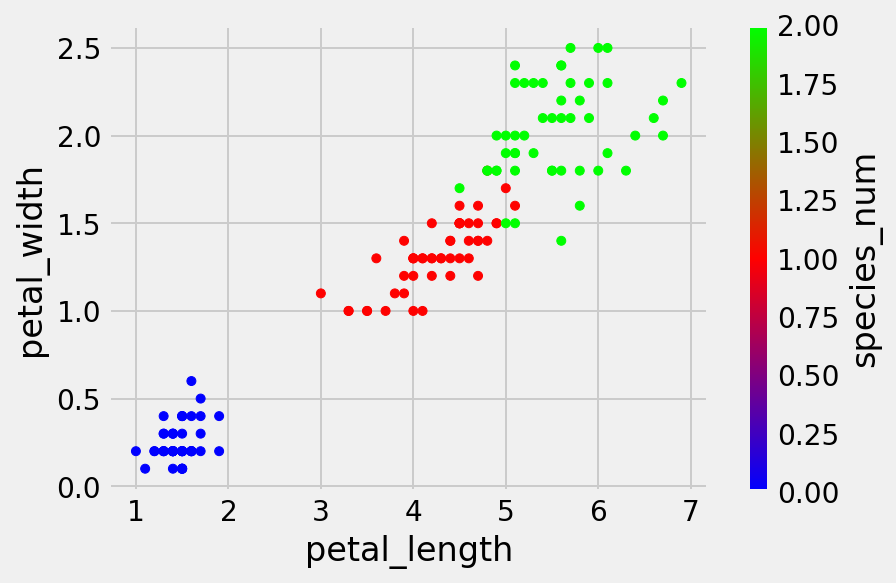

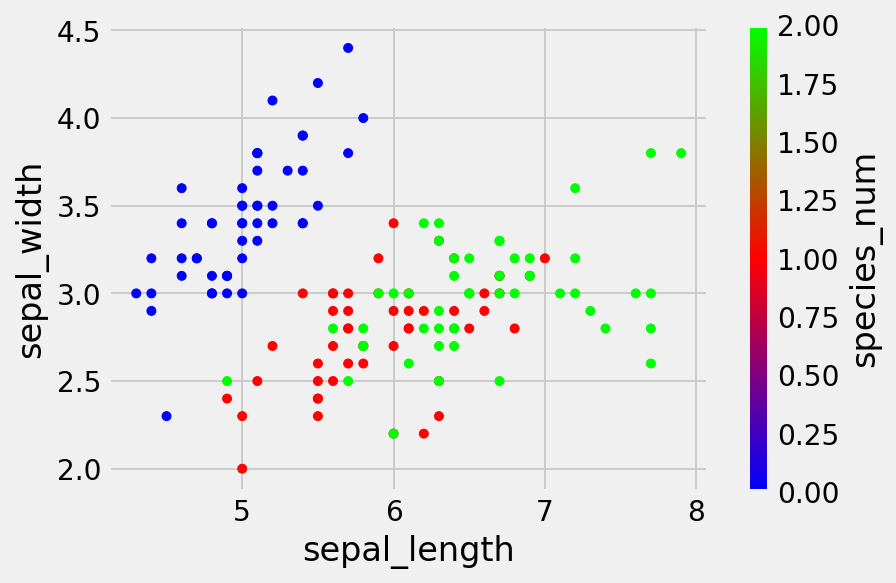

In [34]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg')
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg')

There is pretty good seperate on petal width and length for the different species, while there is some overlap on two of the species in sepal length and width.

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [35]:
feature_cols = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
X= iris[feature_cols]

### Create your target vector "y"
This will be the species type.

In [36]:
y= iris.species_num

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [37]:
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size = 0.7, random_state=99)

lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(lr.intercept_)
print(lr.coef_)

0.2200280047629885
0.24591365184358016
[ 0.23931277  0.57116812 -0.11087644 -0.05736615]


C:\Users\029165\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [39]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


### Create a Model With Five Neighbors. Did it Improve?

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [41]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9555555555555556


### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [42]:
test_acc = []
for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

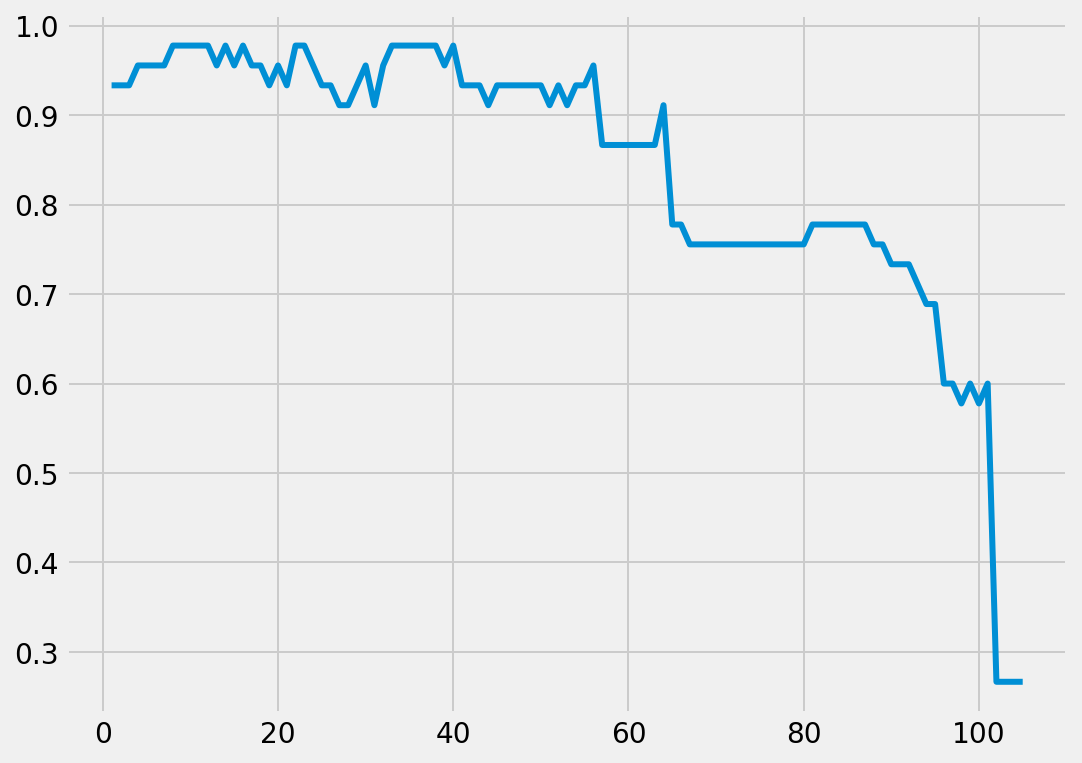

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

 It appears that a neighbor value around 12-20 would be a good fit (or 23-25 or 32-38 seem to hit a similar peak accuracy value)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

In [45]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


16 appear to be the best fit after running through options in the range of 12-20

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [46]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))